# **Sticker Sales Prediction**

### Library Importation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder



import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
test_data.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [5]:
train_data.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


## **Initial Exploration**

In [6]:
test_data.shape

(98550, 5)

In [7]:
train_data.shape

(230130, 6)

In [8]:
train_data.dtypes

id            int64
date         object
country      object
store        object
product      object
num_sold    float64
dtype: object

In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,230130.0,115064.500000,66432.953062,0.0,57532.25,115064.5,172596.75,230129.0
num_sold,221259.0,752.527382,690.165445,5.0,219.00,605.0,1114.00,5939.0


Inferences :

- Id Column have all unique values means it is unique identifier of the dataset 

- Number Sold might have outliers in the data means sometimes we have extreme low sale number and sometimes we have extremem high sales number

- Average Sale Number is 753 approximate

- Number Sold Column Might have some missing values as the count doesn't match the number of rows in the data

In [10]:
train_data.select_dtypes(object).describe().T

,count,unique,top,freq
date,230130,2557,2010-01-01,90
country,230130,6,Canada,38355
store,230130,3,Discount Stickers,76710
product,230130,5,Holographic Goose,46026


Inferences :

- All The columns have same count as the number of rows in the data so no missing values.

- We have 3 different types of stores in the dataset.

- Discount Stickers is the most appearing store in the given data.

- Dataset have data from 6 different countries.

- Canada is the most appearing country in the given data.

- We have 5 unique type of Sticker Products and among them Holographic Goose is the most appearing one.


In [11]:
train_data.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

## **Univariate Analysis**

### **Numerical Columns**

Text(0.5, 1.0, 'for Num_sold\nSkewness = 1.415373452498392\nKurtosis = 2.6123350629213618')

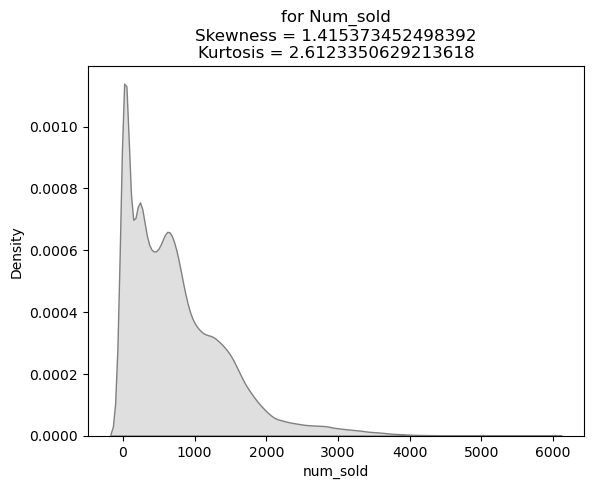

In [12]:
sns.kdeplot(data = train_data, x = 'num_sold', fill=True, color='grey')
plt.title(f'''for Num_sold
Skewness = {train_data['num_sold'].skew()}
Kurtosis = {train_data['num_sold'].kurt()}''')

### **Categorical Columns**

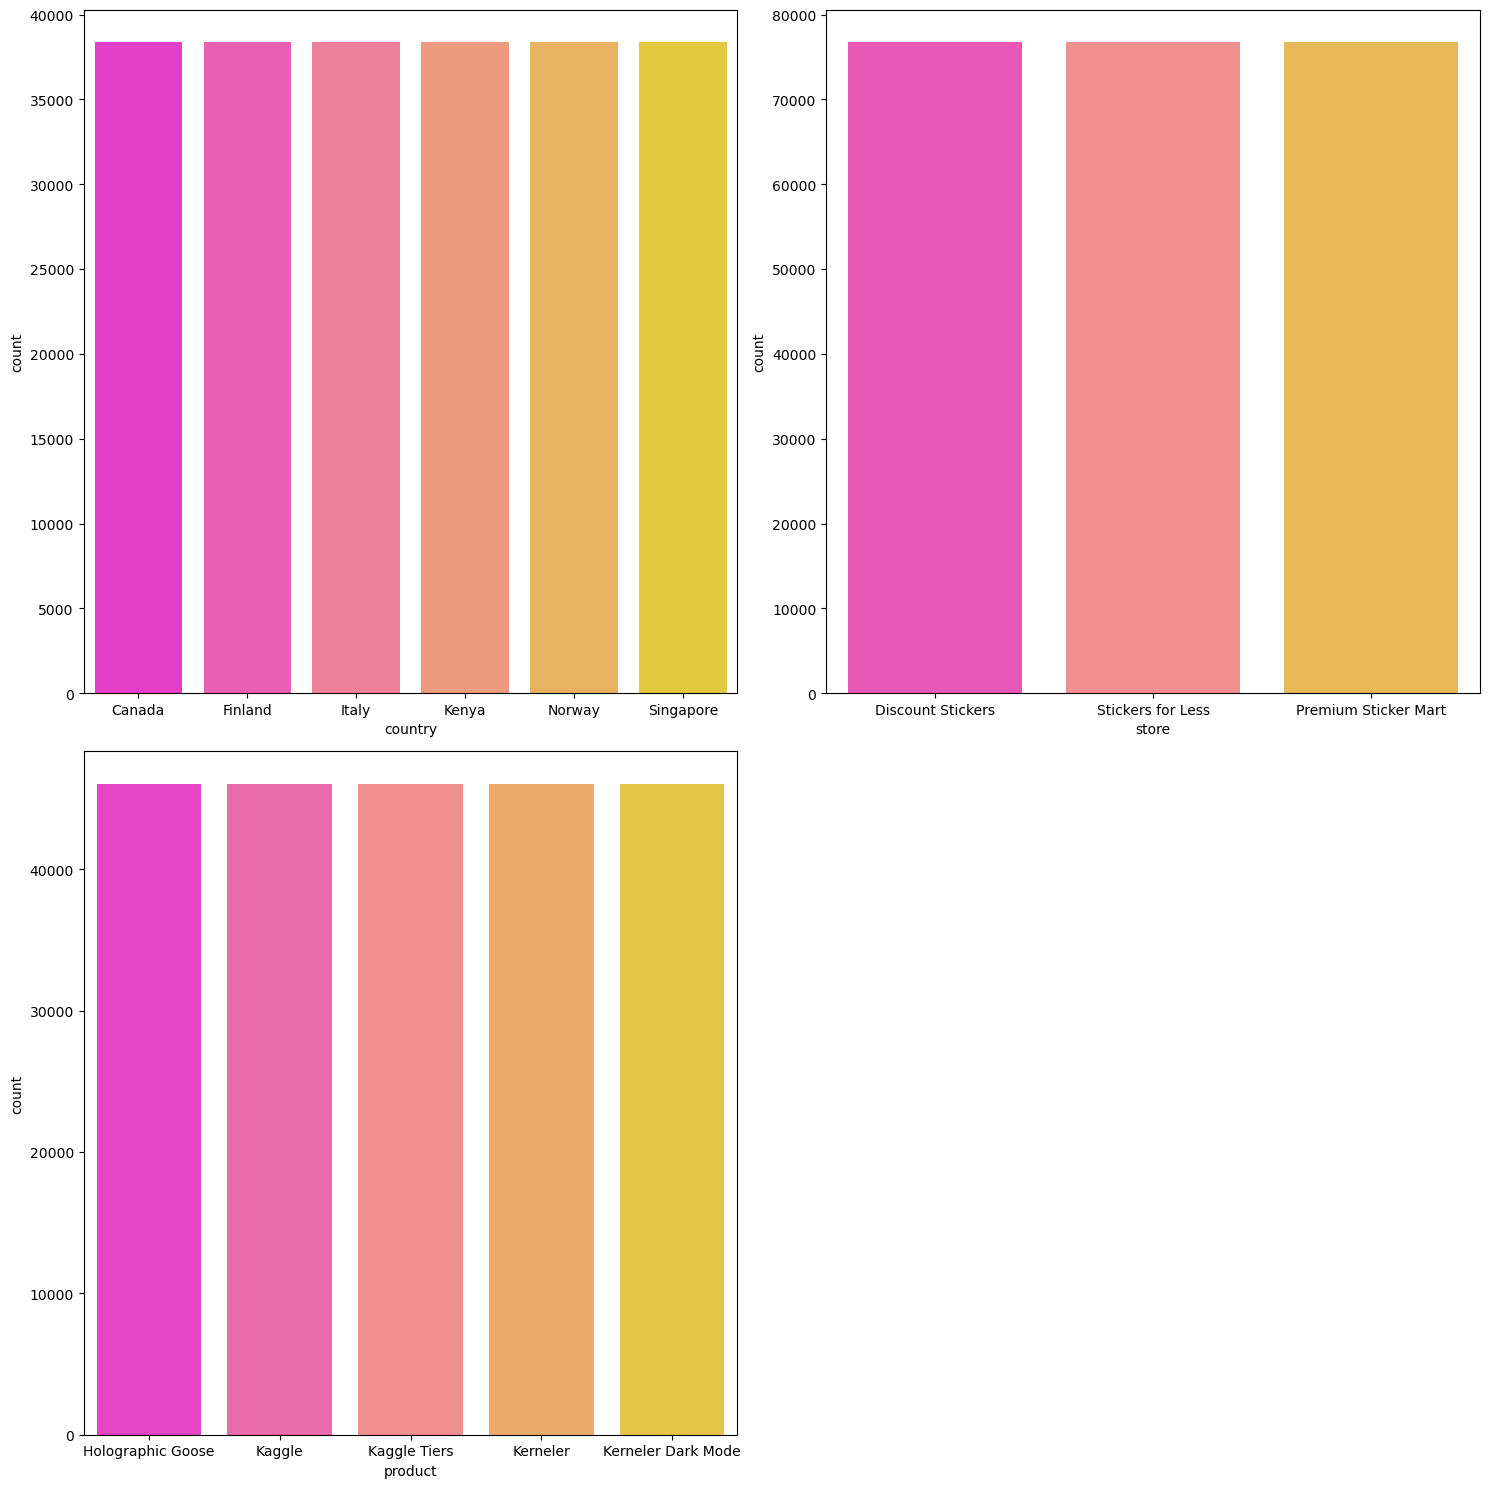

In [15]:
cat_cols = ['country', 'store', 'product']
t = 1
plt.figure(figsize=(15,15))
for i in cat_cols:
    plt.subplot(2,2,t)
    sns.countplot(data=train_data, x = i, palette='spring')
    t +=1


plt.tight_layout()
plt.show()

## **Bivariate Analysis**

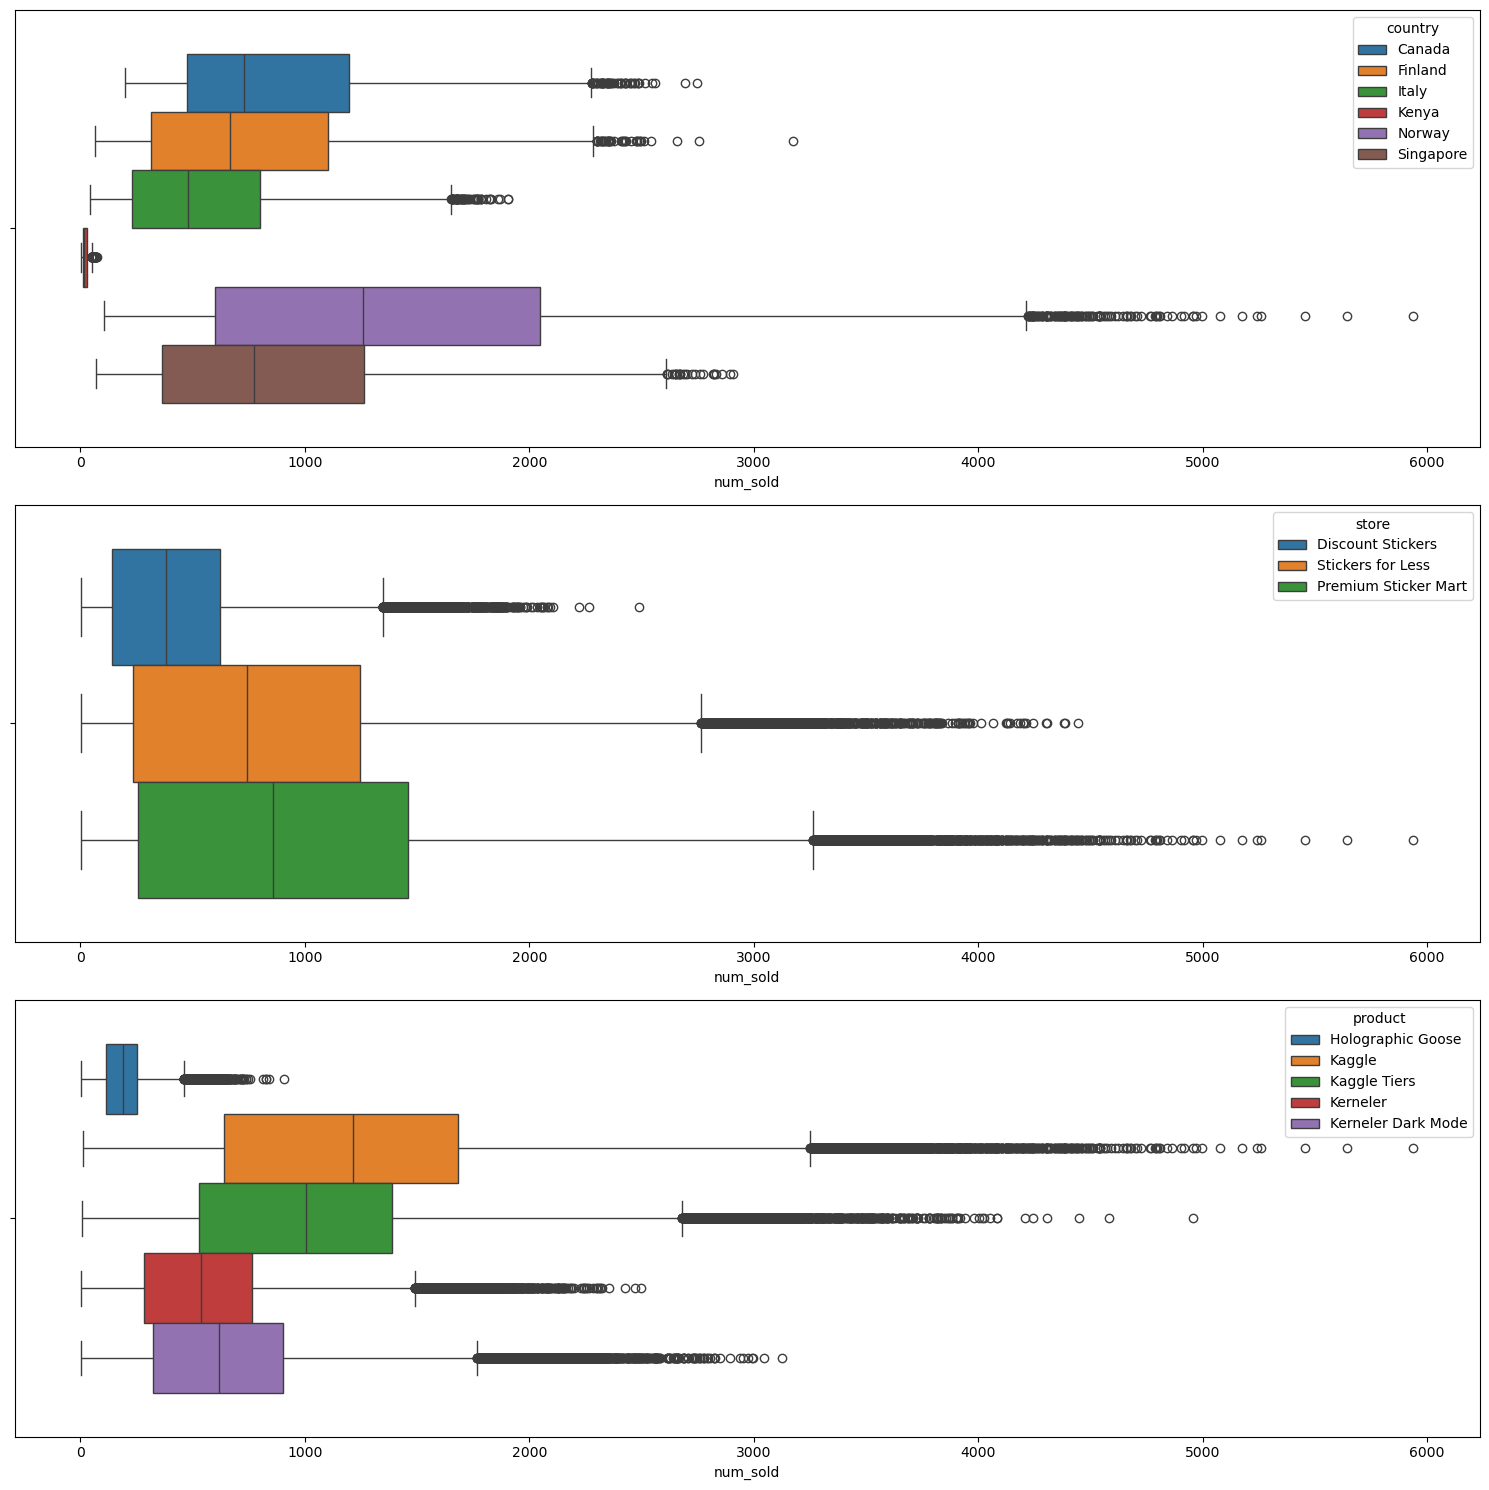

In [14]:
cat_cols = ['country', 'store', 'product']
t = 1
plt.figure(figsize=(15,15))
for i in cat_cols:
    plt.subplot(3,1,t)
    sns.boxplot(data=train_data, x = 'num_sold', hue = i)
    t +=1


plt.tight_layout()
plt.show()

Inferences :

- Country

    - Norway has highest sales distribution but Kenya has Lowest distribution

    - Canada is key player here as it appear most in the data but does not have highest sales it might have good potential but that potential is still ot utilized properly

- Store

    - Discount Sticker is key player here as it appear most in the data but have Lowest sales among all the stores it might have good potential but that potential is still ot utilized properly
    
    - Premium sticker mart have highest sales.

    - Premium sticker mart and stickers for less are in tough competition in terms of highest sales

- Product

    - Holographic Goose Sticker is key player here as it appear most in the data but have Lowest sales among all the stores it might have good potential but that potential is still ot utilized properly

    - Kaggle Stickers have highest sales

## **Duplicate Value Treatment**

In [92]:
train_data.duplicated().sum()

0

## **Null Value Treatment**

In [93]:
train_data.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [94]:
train_data['product'].unique()

array(['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler',
       'Kerneler Dark Mode'], dtype=object)

In [95]:
countries = ['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore']
stores = ['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart']
products = ['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler', 'Kerneler Dark Mode']

# Loop through all combinations and impute missing values
for i in countries:
    for j in stores:
        for k in products:
            train_data.loc[
                (train_data['num_sold'].isnull()) &
                (train_data['country'] == i ) &
                (train_data['store'] == j ) &
                (train_data['product'] == k ),
                'num_sold'
            ] = train_data['num_sold'].median()


In [96]:
train_data.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [97]:
train_data.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,605.0
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [98]:
train_data.set_index('id', inplace = True)
test_data.set_index('id', inplace = True)

In [99]:
test_data.head()

,date,country,store,product
id,,,,
230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
230131,2017-01-01,Canada,Discount Stickers,Kaggle
230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
230133,2017-01-01,Canada,Discount Stickers,Kerneler
230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [100]:
train_data.head()

,date,country,store,product,num_sold
id,,,,,
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,605.0
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


## **Data Preprocessing**

In [101]:
train_data['Year'] = pd.to_datetime(train_data['date']).dt.year
train_data['Month'] = pd.to_datetime(train_data['date']).dt.month
train_data['Date'] = pd.to_datetime(train_data['date']).dt.day


test_data['Year'] = pd.to_datetime(test_data['date']).dt.year
test_data['Month'] = pd.to_datetime(test_data['date']).dt.month
test_data['Date'] = pd.to_datetime(test_data['date']).dt.day

In [102]:
test_data.drop(columns = 'date', inplace=True)

In [103]:
train_data.drop(columns = 'date', inplace=True)

In [104]:
train_data.head()

,country,store,product,num_sold,Year,Month,Date
id,,,,,,,
0,Canada,Discount Stickers,Holographic Goose,605.0,2010,1,1
1,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1


In [105]:
lb = LabelEncoder()

train_data['country'] = lb.fit_transform(train_data['country'])
train_data['store'] = lb.fit_transform(train_data['store'])
train_data['product'] = lb.fit_transform(train_data['product'])

In [106]:
lb = LabelEncoder()

test_data['country'] = lb.fit_transform(test_data['country'])
test_data['store'] = lb.fit_transform(test_data['store'])
test_data['product'] = lb.fit_transform(test_data['product'])

In [107]:
test_data.head()

,country,store,product,Year,Month,Date
id,,,,,,
230130,0,0,0,2017,1,1
230131,0,0,1,2017,1,1
230132,0,0,2,2017,1,1
230133,0,0,3,2017,1,1
230134,0,0,4,2017,1,1


In [108]:
train_data.head()

,country,store,product,num_sold,Year,Month,Date
id,,,,,,,
0,0,0,0,605.0,2010,1,1
1,0,0,1,973.0,2010,1,1
2,0,0,2,906.0,2010,1,1
3,0,0,3,423.0,2010,1,1
4,0,0,4,491.0,2010,1,1


# **MODELLING**

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [110]:
X = train_data.drop(columns='num_sold')
y = train_data['num_sold']

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=3)

print(f'''The Size of X_Train is {x_train.shape}
The Size of X_Val is {x_val.shape}
The Size of Y_Train is {y_train.shape}
The Size of Y_Val is {y_val.shape}''')

The Size of X_Train is (184104, 6)
The Size of X_Val is (46026, 6)
The Size of Y_Train is (184104,)
The Size of Y_Val is (46026,)


In [113]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

In [114]:



def model(model, xtr,ytr,xval,yval):
    mod = model
    mod.fit(xtr,ytr)
    pred = mod.predict(xval)

    print(f'Mean Absolute Percentage error : {mean_absolute_percentage_error(yval, pred)}')






In [115]:
model(LinearRegression(), x_train, y_train, x_val, y_val)

Mean Absolute Percentage error : 8.510907636156093


In [116]:
model(KNeighborsRegressor(), x_train, y_train, x_val, y_val)

Mean Absolute Percentage error : 2.0422390453400348


In [117]:
model(DecisionTreeRegressor(), x_train, y_train, x_val, y_val)

Mean Absolute Percentage error : 0.34074705806331834


In [118]:
model(AdaBoostRegressor(), x_train, y_train, x_val, y_val)

Mean Absolute Percentage error : 2.8026110826489212


In [119]:
model(GradientBoostingRegressor(), x_train, y_train, x_val, y_val)

Mean Absolute Percentage error : 1.5937496720415936


In [120]:
model(RandomForestRegressor(), x_train, y_train, x_val, y_val)

Mean Absolute Percentage error : 0.34328132282337775


In [121]:
model(BaggingRegressor(), x_train, y_train, x_val, y_val)

Mean Absolute Percentage error : 0.3512436043021793


In [122]:
model(LGBMRegressor(), x_train, y_train, x_val, y_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 6
[LightGBM] [Info] Start training from score 745.660051
Mean Absolute Percentage error : 0.5360448879134229


In [123]:
model(CatBoostRegressor(), x_train, y_train, x_val, y_val)

Learning rate set to 0.093338
0:	learn: 620.1837724	total: 11.8ms	remaining: 11.8s
1:	learn: 570.6333183	total: 22.1ms	remaining: 11s
2:	learn: 526.4159284	total: 33.6ms	remaining: 11.2s
3:	learn: 487.0673385	total: 44.1ms	remaining: 11s
4:	learn: 452.1612670	total: 54.8ms	remaining: 10.9s
5:	learn: 421.3043153	total: 65.8ms	remaining: 10.9s
6:	learn: 393.9815866	total: 76.5ms	remaining: 10.8s
7:	learn: 369.3120573	total: 88.1ms	remaining: 10.9s
8:	learn: 347.5392206	total: 99.3ms	remaining: 10.9s
9:	learn: 328.0086964	total: 111ms	remaining: 11s
10:	learn: 310.9726929	total: 122ms	remaining: 11s
11:	learn: 295.2716460	total: 134ms	remaining: 11s
12:	learn: 281.7507036	total: 147ms	remaining: 11.1s
13:	learn: 269.6458726	total: 160ms	remaining: 11.3s
14:	learn: 258.7623787	total: 172ms	remaining: 11.3s
15:	learn: 249.4014417	total: 185ms	remaining: 11.4s
16:	learn: 241.2692309	total: 198ms	remaining: 11.4s
17:	learn: 234.1826061	total: 211ms	remaining: 11.5s
18:	learn: 226.2193313	tota

In [124]:
model(DecisionTreeRegressor(criterion='poisson',random_state=2), x_train, y_train, x_val, y_val)

Mean Absolute Percentage error : 0.3289475684474076


In [125]:
model(RandomForestRegressor(criterion= 'poisson', random_state=2), x_train, y_train, x_val, y_val)

Mean Absolute Percentage error : 0.3388993505445429


In [126]:
model(LGBMRegressor(n_estimators=1000, learning_rate=0.1, min_child_weight=0.0001), x_train, y_train, x_val, y_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 6
[LightGBM] [Info] Start training from score 745.660051
Mean Absolute Percentage error : 0.45943156739923496


In [127]:
model(XGBRegressor(), x_train, y_train,x_val, y_val)

Mean Absolute Percentage error : 0.588711593306196


In [129]:
final_model = DecisionTreeRegressor(criterion='poisson',random_state=2)
final_model.fit(X,y)

DecisionTreeRegressor(criterion='poisson', random_state=2)

In [131]:
final_pred = final_model.predict(test_data)

In [132]:
samp_data = pd.read_csv('sample_submission.csv')
samp_data

,id,num_sold
0,230130,100
1,230131,100
2,230132,100
3,230133,100
4,230134,100
...,...,...
98545,328675,100
98546,328676,100
98547,328677,100
98548,328678,100


In [133]:
samp_data['num_sold'] = final_pred

In [134]:
samp_data

,id,num_sold
0,230130,605.0
1,230131,706.0
2,230132,634.0
3,230133,316.0
4,230134,404.0
...,...,...
98545,328675,466.0
98546,328676,2907.0
98547,328677,2299.0
98548,328678,1242.0


In [135]:
samp_data.to_csv('my_submission.csv', index=False)